# Classificação - Segundo Trabalho IA - 2023.2
Para a classificação com algoritmo de regressão logística, foi utilizada a seguinte base de dados: [Heart Attack Analysis](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Segue o código com os comentários nas células anteriores:

Importando as bibliotecas e funções.

In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

### Base de dados de análise de ataques cardíacos
Esse dataset tem informações sobre pacientes, com o objetivo de prever se terão ataques cardíacos ou não.

In [3]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


O conjunto de dados é baseado em aspectos como idade, sexo, pressão arterial, índice de colesterol no sangue, entre outros.

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Heatmap
O mapa térmico (heatmap) de correlação é utilizado para verificar a força das relações entre as variáveis no conjunto de dados.

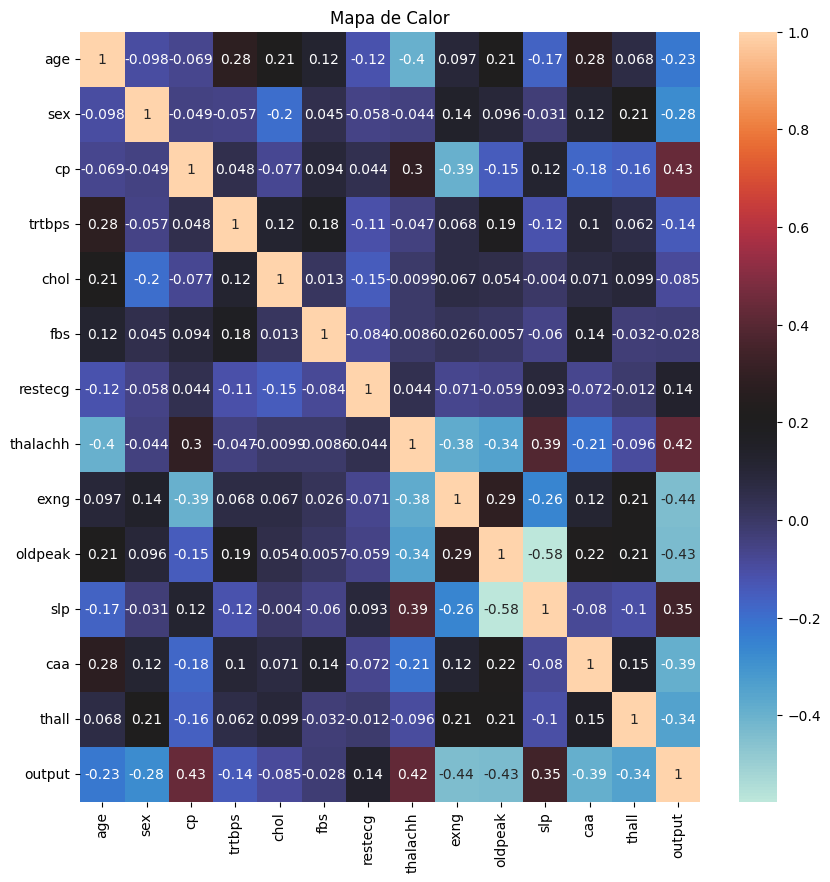

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(heart.corr(), annot=True, cmap='icefire').set_title('Mapa de Calor')
plt.show()

Para obter-se uma melhor observação dos valores em relação ao resultado (coluna 'output'), os resultados da correlação são elencados abaixo.

In [6]:
correlacoes = heart.corr().loc[:, 'output'].drop('output')
maiores_correlacoes = correlacoes.nlargest(10)
print(f"Os maiores valores de correlação com o resultado:")
print(maiores_correlacoes)

Os maiores valores de correlação com o resultado:
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
Name: output, dtype: float64


Os dados são dividos entre treino e teste.

In [7]:
X = heart.drop('output', axis = 1)
y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Em seguida, os dados são normalizados.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Regressão Logística
É realizada a chamada da função de Regressão Logística. O modelo é treinado e testado.

In [9]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da Regressão Logística: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Acurácia da Regressão Logística: 0.8132
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### SVM
É realizada a chamada da função de Máquina de Vetor de Suporte. O modelo é treinado e testado.

In [10]:
svm_classifier = SVC(kernel = 'rbf', C = 1, gamma = 'scale', random_state = 42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do método SVM: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Acurácia do método SVM: 0.8242
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Para observação no gráfico, foram escolhidas as colunas referentes ao tipo de dor no peito ('cp') e à frequência cardíaca máxima alcançada.

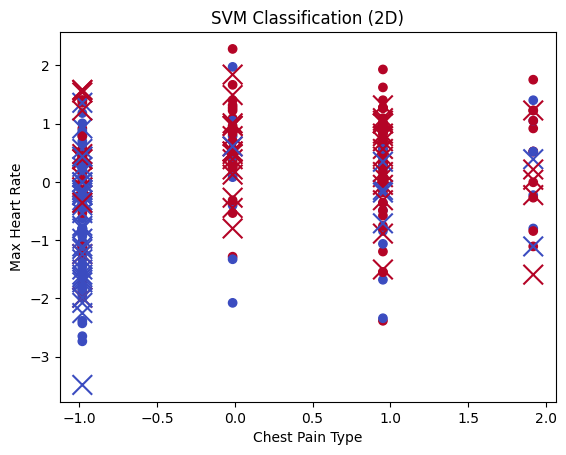

In [11]:
plt.scatter(X_train[:, 2], X_train[:, 7], c = y_train, cmap = plt.cm.coolwarm)
plt.scatter(X_test[:, 2], X_test[:, 7], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=200)
plt.title('SVM Classification (2D)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Max Heart Rate')
plt.show()

### MLP
É realizada a chamada da função de Percetron de Múltiplas Camadas. O modelo é treinado e testado, suas iterações são apresentadas.

In [12]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), activation = 'relu', solver = 'adam', verbose = True, max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do método MLP: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Iteration 1, loss = 0.69305622
Iteration 2, loss = 0.66103736
Iteration 3, loss = 0.63553055
Iteration 4, loss = 0.61273682
Iteration 5, loss = 0.59057472
Iteration 6, loss = 0.56909975
Iteration 7, loss = 0.54850612
Iteration 8, loss = 0.52966295
Iteration 9, loss = 0.51175433
Iteration 10, loss = 0.49539902
Iteration 11, loss = 0.48056857
Iteration 12, loss = 0.46671840
Iteration 13, loss = 0.45424009
Iteration 14, loss = 0.44275015
Iteration 15, loss = 0.43259713
Iteration 16, loss = 0.42316976
Iteration 17, loss = 0.41450510
Iteration 18, loss = 0.40616954
Iteration 19, loss = 0.39845873
Iteration 20, loss = 0.39135304
Iteration 21, loss = 0.38485380
Iteration 22, loss = 0.37896687
Iteration 23, loss = 0.37341056
Iteration 24, loss = 0.36830190
Iteration 25, loss = 0.36359985
Iteration 26, loss = 0.35907605
Iteration 27, loss = 0.35513379
Iteration 28, loss = 0.35124503
Iteration 29, loss = 0.34782319
Iteration 30, loss = 0.34462752
Iteration 31, loss = 0.34156959
Iteration 32, los

Novamente, observa-se o resultado de acordo com as varíaveis mais influentes no resultado.

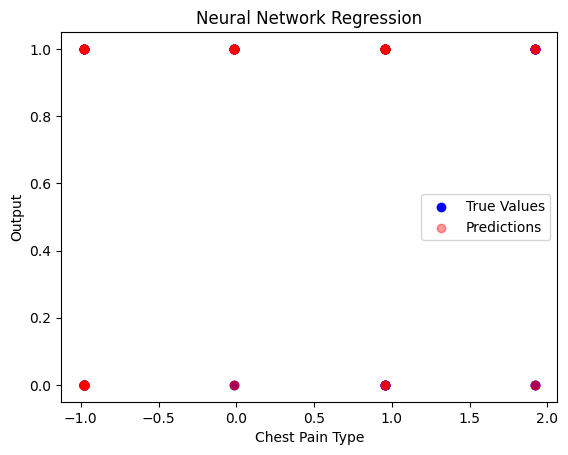

In [13]:
plt.scatter(X_test[:, 2], y_test, color='blue')
plt.scatter(X_test[:, 2], y_pred, color = 'red', alpha =.4)

plt.xlabel('Chest Pain Type')
plt.ylabel('Output')
plt.title('Neural Network Regression')

plt.legend(['True Values', 'Predictions'])
plt.show()

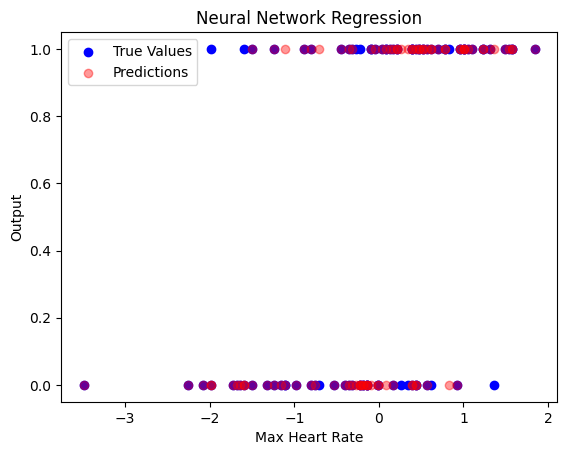

In [14]:
plt.scatter(X_test[:, 7], y_test, color='blue')
plt.scatter(X_test[:, 7], y_pred, color = 'red', alpha =.4)

plt.xlabel('Max Heart Rate')
plt.ylabel('Output')
plt.title('Neural Network Regression')

plt.legend(['True Values', 'Predictions'])
plt.show()

### Resultados
Observando a acurácia, destaca-se o desempenho muito semelhante entre os três métodos. Um possível motivo para isso é a base de dados não possuir uma complexidade alta a ponto de precisar de abordagens diferentes para interpretar correta e satisfatoriamente os dados, de acordo com o requisito do trabalho (80% de acurácia).
Assim, os métodos SVM e MLP, mais complexos, obtiveram um resultado ligeiramente superior à Regressão Logística.